In [1]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=cc61cf170c8d6f14d4b728d80313d74cda1cb2e1f12dce46bc90e975feaec220
  Stored in directory: c:\users\nikhil\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist=k.datasets.mnist
(Xtrain,ytrain),(Xtest,ytest)=mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [5]:
Xtrain[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
ytrain[10]

3

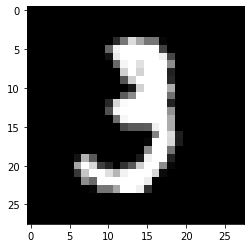

In [7]:
plt.imshow(Xtrain[10],cmap='gray')
plt.show()

In [8]:
## Build the model
model = k.models.Sequential()
### Add the layers
model.add(k.layers.Flatten())  ## input layer
model.add(k.layers.Dense(784,activation="relu"))   ## hidden layer
model.add(k.layers.Dense(10,activation='softmax'))    ## output layer
### Compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam"
              ,metrics=["accuracy"])

In [9]:
### scale the data/Normalize
Xtrain_scaled=Xtrain/255
Xtest_scaled=Xtest/255

In [10]:
### train the model
model.fit(Xtrain_scaled,ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 10ms/step - loss: 0.1898 - accuracy: 0.9431
Epoch 2/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0773 - accuracy: 0.9760
Epoch 3/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0495 - accuracy: 0.9842
Epoch 4/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0342 - accuracy: 0.9886
Epoch 5/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0246 - accuracy: 0.9916
Epoch 6/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 7/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0165 - accuracy: 0.9944
Epoch 8/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0162 - accuracy: 0.9950
Epoch 9/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 10/15
1875/1875 [==============================] - 17s 9ms/

In [11]:
## prediction
ypred=model.predict(Xtest_scaled)

In [12]:
ytest[100]

6

In [13]:
ypred[100]

array([2.3796889e-12, 5.2533695e-17, 3.2331692e-13, 5.1654538e-18,
       1.5299517e-14, 1.3601870e-09, 1.0000000e+00, 5.0078358e-15,
       1.0619116e-10, 7.0069106e-20], dtype=float32)

In [14]:
ypred[100].argmax()

6

In [15]:
model.evaluate(Xtest_scaled,ytest)

313/313 [==============================] - 2s 4ms/step - loss: 0.0984 - accuracy: 0.9830


[0.0983884185552597, 0.9829999804496765]

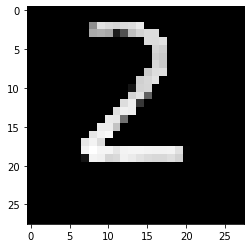

In [16]:
import cv2 
img = cv2.imread("2.png",0)
img.shape
## preprocessing of image
img = cv2.resize(img,(28,28,))
img = cv2.bitwise_not(img)
img = img/255
plt.imshow(img,cmap='gray')
plt.show()

In [17]:
model.predict(np.array([img]))

array([[2.2055396e-14, 1.3785036e-16, 1.0000000e+00, 1.8241615e-14,
        1.2156837e-19, 2.1556609e-14, 2.8408325e-09, 7.8507730e-22,
        1.7155794e-19, 1.9087474e-28]], dtype=float32)

In [18]:
model.predict(np.array([img])).argmax()

2